### Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv')

In [3]:
df.shape

(500, 9)

In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [8]:
for col in df.columns:
    n = df[col].isnull().sum()
    if(n>0):
        print('%s: %d' % (col,df[col].isnull().sum()))

In [43]:
# Columns for simple linear regression
y = df['Chance of Admit ']
x = df['GRE Score']

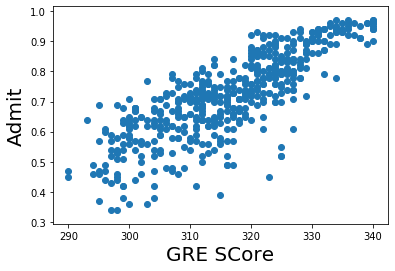

In [44]:
plt.scatter(x,y)
plt.xlabel('GRE SCore', fontsize = 20)
plt.ylabel('Admit', fontsize = 20)
 
plt.show()

In [45]:
x = (x - x.mean())/x.std()
x.head()

0    1.817417
1    0.666481
2   -0.041788
3    0.489414
4   -0.218855
Name: GRE Score, dtype: float64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [47]:
y_test = np.array(y_test)

In [48]:
X_train = np.array(X_train).reshape(-1,1)

In [49]:
X_test = np.array(X_test).reshape(-1,1)

In [50]:
model = LinearRegression()

In [51]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
model.score(X_train, y_train)

0.6857602636111244

In [53]:
y_pred = model.predict(X_test)

In [54]:
y_pred[0:4]

array([0.79852505, 0.88154151, 0.49759042, 0.70513155])

In [55]:
y_test[:4]

array([0.82, 0.94, 0.69, 0.65])

In [56]:
np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred))

0.09560020580988367

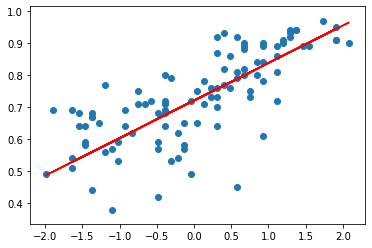

In [57]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()

### Multiple Linear Regression

In [42]:
# Columns for Multiple Linear Regression
cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']
df2 = df[cols]

In [25]:
df2.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [26]:
y_mlr = df['Chance of Admit ']

In [27]:
X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(df2, y_mlr, test_size=0.2, random_state=123)

In [28]:
mlr = LinearRegression()

In [29]:
mlr.fit(X_train_mlr, y_train_mlr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
mlr.score(X_train_mlr, y_train_mlr)

0.8309229292126588

In [31]:
y_pred_mlr = mlr.predict(X_test_mlr)

In [32]:
y_test_mlr[0:10]

229    0.82
337    0.94
327    0.69
416    0.65
306    0.79
131    0.77
5      0.90
431    0.73
434    0.64
134    0.89
Name: Chance of Admit , dtype: float64

In [33]:
y_pred_mlr[0:10]

array([0.80768917, 0.93479876, 0.5303792 , 0.62362643, 0.81791424,
       0.70034296, 0.87583228, 0.77662275, 0.62056647, 0.88393921])

In [34]:
np.sqrt(mean_squared_error(y_true=y_test_mlr, y_pred=y_pred_mlr))

0.06587382683944311

In [36]:
test_set_r2 = r2_score(y_test_mlr, y_pred_mlr)
test_set_r2

0.7787822431585506

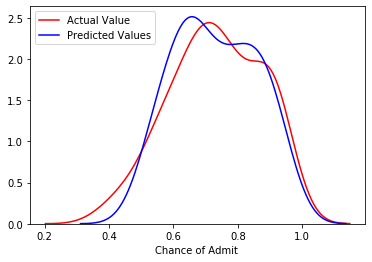

In [37]:
ax1 = sns.distplot(y_test_mlr, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_mlr, hist=False, color="b", label="Predicted Values" , ax=ax1)